# Proyecto 2
## Parte 1:Teoría de Álgebra Lineal y Optimización
__1.¿Por qué una matriz equivale a una transformación lineal entre espacios vectoriales?__  
Una matriz equivale a una transformación lineal porque respeta las propiedades fundamentales de una transformación lineal que son la distributividad de la suma y la multiplicación por escalares. 
<math>
$T:R^m \rightarrow R^n \ es \ una \ transformación \ lineal \ si:$
$$T(\vec x+\vec y)=T(\vec x)+T(\vec y)$$
$$T(\propto \vec x)=\propto \ T(\vec x)$$

$Veamos \ que \ $
$$Ax=A(x_1e_1+...+X_ne_n)=x_1A^1+...+x_nA^n$$
$$T(x)=T(\sum_{i=1}^n x_ie_i)=x_1T(e_1)+...+x_nT(e_n)$$
$$A^j=T(e_j) \Rightarrow Ax=T(x)$$
</math>

__2.¿Cuál es el efecto de transformación lineal de una matriz diagonal y el de una matriz ortogonal?__  
Una matriz diagonal va a redimensionar el volumen, en particular cada entrada de la diagonal $d_i$ va a determinar la proporción en que será escalada la dimensión $x_i$. Mientras que una matriz ortogonal es una rotación o una reflexión dado que preserva el volumen.

__3.¿Qué es la descomposición en valores singulares de una matriz?__  
La descomposición en valores singulares es la descomposición de la matriz $A \in R_{mxn} $ de la siguiente forma $$A=U\sum V^T$$
con U matriz ortogonal de mxm  
    V matriz ortogonal de nxn  
    $\sum \ $matriz de mxn que es una matriz prácticamente diagonal, en la cual los valores de la diagonal son los valores singulares de A ordenados de mayor a menor y ceros en el excedente de dimensiones para que la matriz se pueda multiplicar por U y V.  
La SVD permite reducir la complejidad de la matriz, lo cual permite resolver sistemas de ecuaciones con soluciones numéricamente estables.

__4.¿Qué es diagonalizar una matriz y que representan los eigenvectores?__  
Diagonalizar la matriz A es factorizarla de la forma $A=WDW^-1$ con D matriz diagonal.  
Los eigenvectores de A son las columnas de W y los eigenvalores de A son las entradas de la diagonal D.  
Y si A es simétrica y diagonalizable, los eigenvectores de A son base de $R^n$.

__5.¿Intuitivamente qué son los eigenvectores?__  
Los eigenvectores son los ejes de la transformación, dado que la transformación únicamente los redimensiona. Otra forma de verlo más geométricamente es que son los ejes de la elipse que resulta de aplicar la transformación a una esfera unitaria.

__6.¿Cómo interpretas la descomposición en valores singulares como una composición de tres tipos de transformaciones lineales simples?__  
La descomposición de una matriz en valores singulares es la recreación de la transformación de la matriz a mediante la composición de tres transformaciones, una rotación, una redimensión de los ejes canónicos y una rotación final. De esta forma $A=U\sum V^T \ $, donde U y $V^T \ $ son las rotaciones y $\sum \ $ es el redimensionamiento.

__7.¿Qué relación hay entre la descomposición en valores singulares y la diagonalización?__  
No todas las matrices son diagonalizables y cuadradas, sin embargo la SVD permite generalizar el concepto de la diagonalización para todas las matrices.  
Un dato relevante es que $\sum \sum^T$ es una diagonalización de $AA^T$ $$AA^tU=\sum\sum U$$ $$ie \ AA^tU_i=\sigma_i^2u_i$$  
lo cual permite obtener la SVD al resolver $AA^T= \lambda u$ y $AV=U\sum$.


__8.¿Cómo se usa la descomposición en valores singulares para dar una aproximación de rango menor a una matriz?__  
En la SVD, $A=U\sum V^T$ y $\sum$ tiene el mismo rango que A, sin embargo recordamos que $\sum$ es una matriz prácticamente diagonal en la cual las entradas de la diagonal son los valores singulares de la matriz ordenados de mayor a menor. Por lo cual si se conservan $k \leq rango(A)$ de esos valores singulares la transformación va a ser muy similar a la de A pero con una matriz de menor rango. La aproximación de A con rango k es
$$A_k=\sum_{i=1}^k \sigma_iu_iv_i^T \ con \ k<rango(A)$$

__9.Describe el método de minimización por descenso gradiente__  
Es un método de optimización en el cual se encuentra el mínimo de una función al seguir los mínimos locales de forma iterativa. Se inicia en un punto arbitrario, se identifica el gradiente que es el vector que señala la dirección en que la función créce más rápidamente (análogamente $-\nabla f(x)$ es la dirección en que la función decrece más rápidamente) y en la iteración se avanza en la dirección opuesta del gradiente y se repite el proceso hasta llegar al mínimo de la función. De forma recursiva se identifica $$X_k=X_{k-1}-\alpha \nabla f(X_{k-1})$$

__10.Menciona 4 ejemplo de problemas de optimización (dos con restricciones y dos sin restricciones) que te parezcan interesantes como Científico de Datos__  


## Parte 2: Aplicaciones de Python
__1.Compresión de imágenes con aplicando la SVD__

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#Como vamos a trabajar con imagenes blanco y negro, tomamos una imagen a color y la convertimos a BW.
im = Image.open("C:/Users/Zuraya/Pictures/Rossum.jpg", 'r').convert('LA')
mat = np.array(list(im.getdata(band=0)), float)
mat.shape = (im.size[1], im.size[0])
mat = np.matrix(mat)
#Usamos la SVD
U, s, V = np.linalg.svd(mat)
#Definimos el grado k de la aproximación
for k in range (10, 50, 10):
    rec = np.matrix(U[:, :k]) * np.diag(s[:k]) * np.matrix(V[:k, :])
    plt.imshow(rec, cmap='gray')
    plt.savefig("C:/Users/Zuraya/Pictures/Rossum_comp_" + str(k) + ".jpg")


La imagen original en blanco y negro
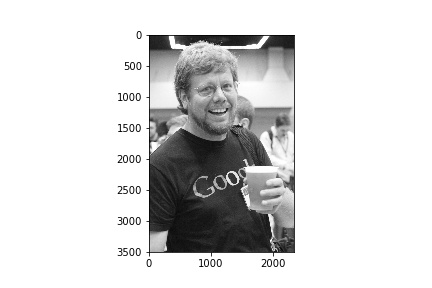
La aproximación de grado 10
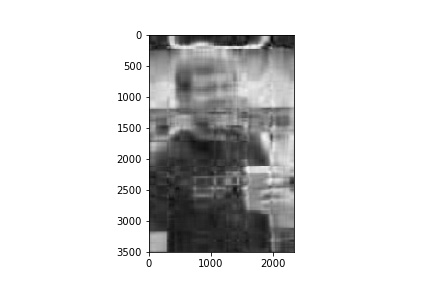
La aproximación de grado 20
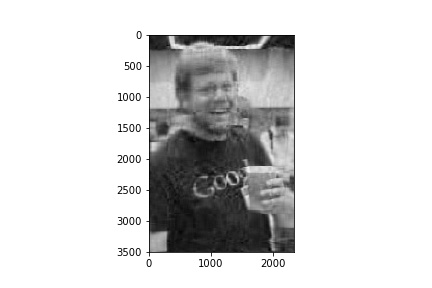
La aproximación de grado 30
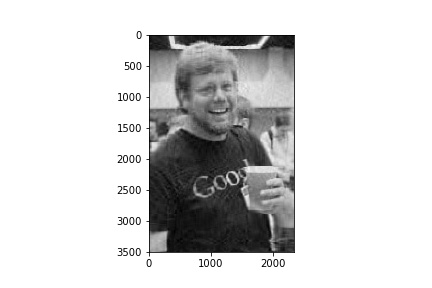
La aproximación de grado 40
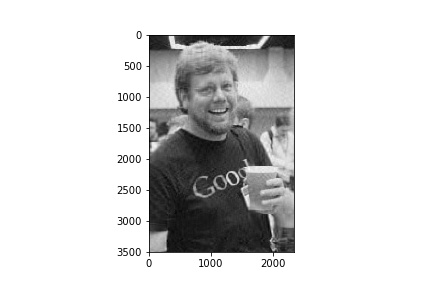

En este proyecto comprimimos una imagen dado que al descomponer la matriz asociada a dicha imagen y preservar los k valores singulares más grandes redujimos el tamaño de la imagen.

__2. Sistemas de ecuaciones con pseudoinversa__


In [ ]:
import numpy as np
def pseudoinv(self):
    U, s, V = np.linalg.svd(self)
    Ut = U.T
    #Aún no se como resolver cuando s es de un solo renglón
    #También intenté hacerlo manual pero shape tiene una sola entrada
    ss = np.linalg.inv(s)
    Vt = V.T
    pseudo=Vt*ss*Ut
M=np.array([[1,1], [0,0]])
pseudoinv(M)

(a) Observar que pasa si b esta en la imagen de A (contestar cuál es la imagen) y si no está (ej. b = [1,1]). 
    Si b está en la imagen de A entonces existe una solución, sino la solución está en los complejos.
(b) Contestar, ¿la solución resultante es única? Si hay más de una solución, investigar que carateriza a la solución devuelta.
    Si $A^+A=I$ la solución es única, es decir cuando las columnas de A son linealmente independientes. 
(c) Repetir cambiando A=[[1,1],[0,1e-32]], ¿En este caso la solucíon es única? ¿Cambia el valor devuelto de x en cada posible valor de b del punto anterior?